### Group Notebook

In [12]:
import pandas as pd
import numpy as np
pools = pd.read_csv("PoolData.csv")
facil = pd.read_csv("facilities.csv")
playg = pd.read_csv("playgrounds.csv")

Arrange all of the datasets into value_counts to see how many facilities there are per neighborhood

In [6]:
pools['neighborhood'].value_counts().head(5)

Highland Park       2
South Side Flats    2
Beltzhoover         1
Lincoln Place       1
Brighton Heights    1
Name: neighborhood, dtype: int64

In [7]:
facil['neighborhood'].value_counts().head(5)

Highland Park          30
Squirrel Hill South    29
Perry North            20
Brookline              19
Strip District         15
Name: neighborhood, dtype: int64

In [8]:
playg['neighborhood'].value_counts().head(5)

Squirrel Hill South    8
Beechview              5
South Side Slopes      5
Sheraden               4
Beltzhoover            4
Name: neighborhood, dtype: int64

Rename the value_counts dataframes so their easier to call

In [13]:
po = pools['neighborhood'].value_counts()
fa = facil['neighborhood'].value_counts()
pl = playg['neighborhood'].value_counts()

Add the facilities and pool dataframes together

In [16]:
new = fa.add(po, fill_value=0)
new

Allegheny Center       5.0
Allegheny West         3.0
Allentown              3.0
Banksville             8.0
Bedford Dwellings      7.0
                      ... 
Upper Lawrenceville    1.0
West End               2.0
West Oakland           1.0
Westwood               5.0
Windgap                3.0
Name: neighborhood, Length: 75, dtype: float64

Add in the playground data

In [21]:
new2 = new.add(pl, fill_value=0)
new2

Allegheny Center       9.0
Allegheny West         3.0
Allentown              4.0
Banksville             9.0
Bedford Dwellings      8.0
                      ... 
Upper Lawrenceville    4.0
West End               3.0
West Oakland           2.0
Westwood               6.0
Windgap                4.0
Name: neighborhood, Length: 79, dtype: float64

Make a bar graph with all the data

<AxesSubplot:>

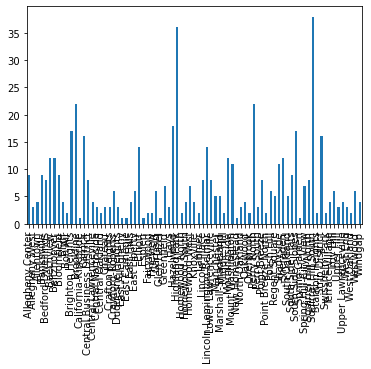

In [23]:
new2.plot.bar(x='neighborhood')

This chart is super crowded, so we are going to filter out any neighborhoods that have less than fifteen facilities

In [27]:
filterednew2 = new2[new2>=15]
filterednew2

Brighton Heights       17.0
Brookline              22.0
Carrick                16.0
Hazelwood              18.0
Highland Park          36.0
Perry North            22.0
South Side Slopes      17.0
Squirrel Hill South    38.0
Strip District         16.0
Name: neighborhood, dtype: float64

The new bar chart for the filtered data:

<AxesSubplot:>

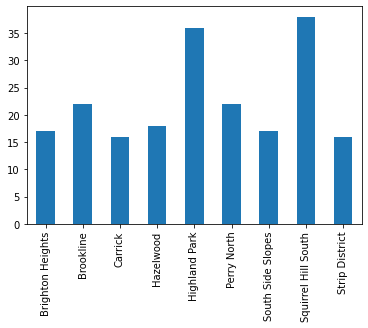

In [28]:
filterednew2.plot.bar(x='neighborhood')

Here is the new bar chart, and it shows that Squirrel Hill South has the most facilities of all the neighborhoods.

Now lets look at what facilities Squirrel Hill South has...

Filter out the facilities dataframe to just have values that are from Squirrel Hill South

In [38]:
query_mask = facil['neighborhood']=='Squirrel Hill South'
SqH = facil[query_mask]
SqH.head(5)

,id,parcel_id,inactive,name,rentable,type,primary_user,address_number,street,zip,...,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
98,381762852,27-S-150-0-1,f,Flagstaff Hill Gazebo,f,Shelter,Department of Public Works,NaN,FREW AVE,NaN,...,Squirrel Hill South,5,14.0,42003980500,3.0,14.0,4.0,2-8,40.440885,-79.947778
105,280573423,127-H-100-0-1,f,Frick Park Blue Slide Park Concession Stand,f,Concession,Department of Public Works,NaN,ENGLISH LN,NaN,...,Squirrel Hill South,5,14.0,42003980300,3.0,14.0,4.0,2-21,40.429513,-79.913793
106,1220088240,127-H-100-0-1,f,Frick Park Blue Slide Park Restrooms,f,Restrooms,Department of Public Works,NaN,ENGLISH LN,NaN,...,Squirrel Hill South,5,14.0,42003980300,3.0,14.0,4.0,2-21,40.429481,-79.913725
107,1418496458,127-H-100-0-1,f,Frick Park Blue Slide Park Shelter,f,Shelter,Department of Public Works,NaN,BEECHWOOD BLVD,NaN,...,Squirrel Hill South,5,14.0,42003980300,3.0,14.0,4.0,2-21,40.430172,-79.914966
112,1655062579,NaN,f,Frick Park Duffy Cabin,f,Storage,Department of Public Works,NaN,NaN,NaN,...,Squirrel Hill South,5,14.0,42003980300,3.0,14.0,4.0,2-21,40.437036,-79.906963


List the types of facilities as well as how many in the neighborhood

In [39]:
SqtTypes = SqH['type'].str.lower().value_counts()
SqtTypes

shelter       12
office         4
restrooms      3
cabin          2
activity       2
service        2
storage        1
pool           1
concession     1
Name: type, dtype: int64

Let's look at how many playgrounds and pools now by doing the same thing for the other two datasets

In [44]:
query_mask2 = playg['neighborhood']=='Squirrel Hill South'
SqG = playg[query_mask2]
SqG['neighborhood'].value_counts()

Squirrel Hill South    8
Name: neighborhood, dtype: int64

This shows that there are 8 playgrounds in Squirrel Hill South

In [47]:
query_mask3 = pools['neighborhood']=='Squirrel Hill South'
SqP = pools[query_mask3]
SqP['neighborhood'].value_counts()

Squirrel Hill South    1
Name: neighborhood, dtype: int64

This shows only 1 pool in Squirrel Hill South

### Therefore Squirrel Hill South is the best neighborhood in Pittsburgh, with 38 total facilities.